In [ ]:
# data
import pandas as pd

df = pd.read_csv("../data/headlines_finbert.csv")

print(df.shape)       # rows, columns
print(df.columns)     # column names
print(df.dtypes)      # data types
print(df.head())      # first 5 rows
print(df.isna().sum()) # missing value counts

(19127, 10)
Index(['Title', 'Date', 'OP', 'CP', 'OP_next', 'finbert_label', 'finbert_neg',
       'finbert_neu', 'finbert_pos', 'finbert_confidence'],
      dtype='object')
Title                  object
Date                   object
OP                    float64
CP                    float64
OP_next               float64
finbert_label          object
finbert_neg           float64
finbert_neu           float64
finbert_pos           float64
finbert_confidence    float64
dtype: object
                                               Title        Date      OP  \
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"  02/01/2008  1468.0   
1  Dow Tallies Biggest First-session-of-year Poin...  02/01/2008  1468.0   
2                   2008 predictions for the S&P 500  02/01/2008  1468.0   
3  U.S. Stocks Higher After Economic Data, Monsan...  03/01/2008  1447.5   
4  U.S. Stocks Climb As Hopes Increase For More F...  07/01/2008  1414.1   

        CP  OP_next finbert_label  finbert_neg  finbert_

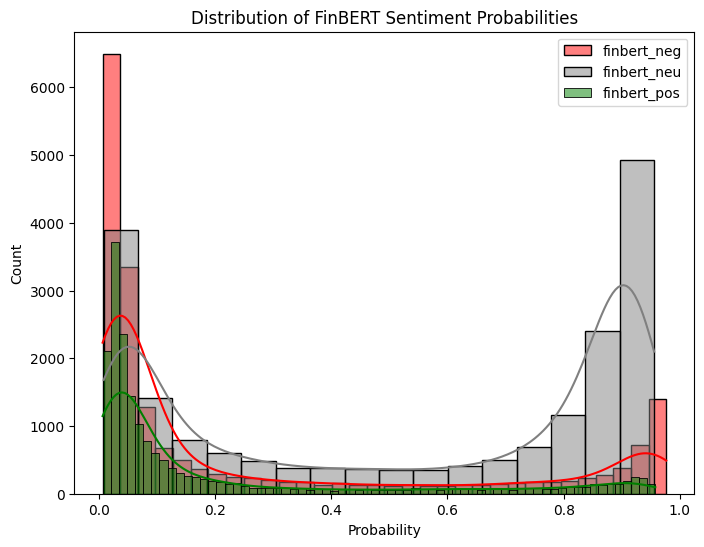

In [ ]:
# histogram of FinBERT sentiment probabilities
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
for col, color in zip(["finbert_neg", "finbert_neu", "finbert_pos"], ["red", "gray", "green"]):
    sns.histplot(df[col], kde=True, color=color, label=col, alpha=0.5)

plt.legend()
plt.title("Distribution of FinBERT Sentiment Probabilities")
plt.xlabel("Probability")
plt.show()


/var/folders/_n/tg28l1tj2m1chnykvgg2ppmm0000gn/T/ipykernel_4441/1448474514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="finbert_label", data=df, palette=["red", "gray", "green"])


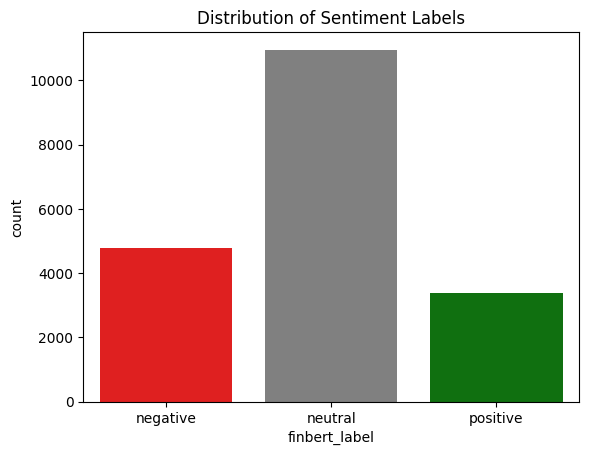

In [ ]:
# count of sentiment labels
sns.countplot(x="finbert_label", data=df, palette=["red", "gray", "green"])
plt.title("Distribution of Sentiment Labels")
plt.show()

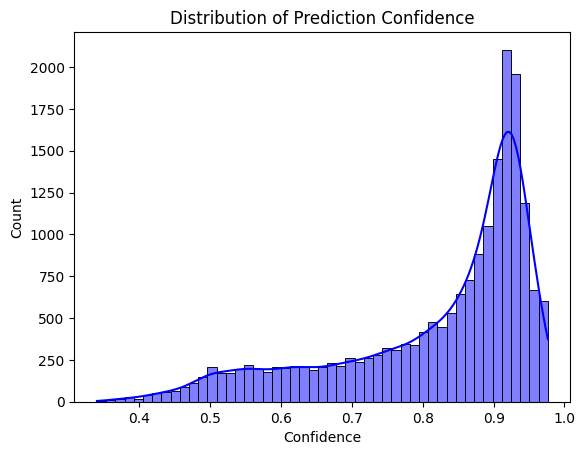

In [5]:
# confidence distribution
sns.histplot(df["finbert_confidence"], kde=True, color="blue")
plt.title("Distribution of Prediction Confidence")
plt.xlabel("Confidence")
plt.show()

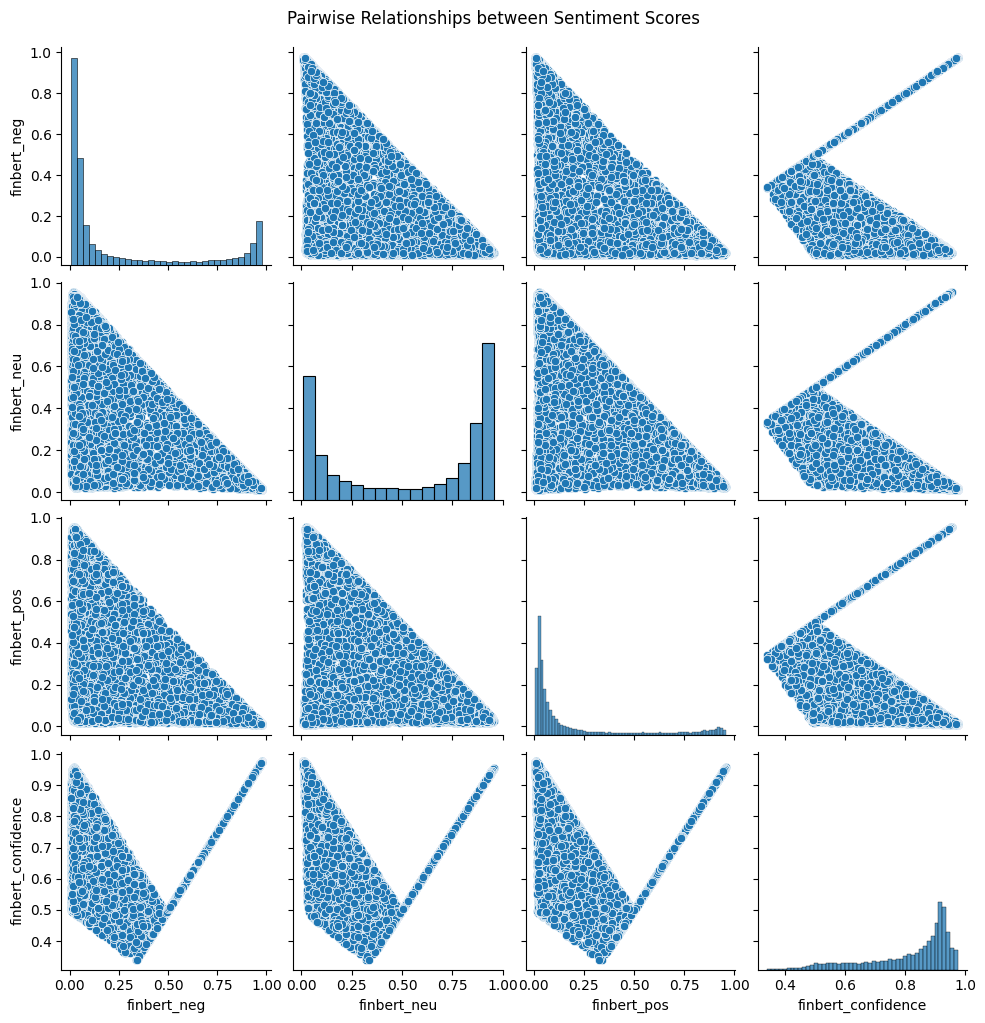

In [6]:
# scatter plots
sns.pairplot(df[["finbert_neg", "finbert_neu", "finbert_pos", "finbert_confidence"]])
plt.suptitle("Pairwise Relationships between Sentiment Scores", y=1.02)
plt.show()



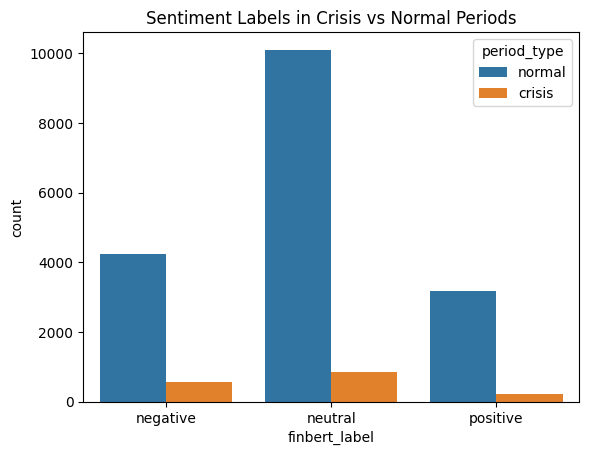

In [7]:
# crisis vs normal
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Define crisis periods
crisis_periods = [
    ("2008-09-01", "2009-06-30"),
    ("2020-02-15", "2020-06-30"),
    ("2022-02-15", "2022-06-30")
]

df["period_type"] = "normal"
for start, end in crisis_periods:
    mask = (df["Date"] >= start) & (df["Date"] <= end)
    df.loc[mask, "period_type"] = "crisis"

sns.countplot(x="finbert_label", hue="period_type", data=df)
plt.title("Sentiment Labels in Crisis vs Normal Periods")
plt.show()
